# Project: exploratory data analysis. Research of apartment sale ads

**Description of the project:**

You have at your disposal the data of the real estate sales service — an archive of ads for the sale of apartments in St. Petersburg and neighboring settlements for several years. You need to learn how to determine the market value of real estate. To do this, conduct a exploratory analysis of the data and set the parameters that affect the price of the objects. This will allow you to build an automated system: it will track down anomalies and fraudulent activity.

Two types of data are available for each apartment for sale. The first ones are entered by the user, the second ones are obtained automatically based on cartographic data. For example, the distance to the center, airport and other facilities — this data is automatically obtained from geoservices. The number of parks and reservoirs is also filled in without the user's participation.

## Upload the data from the file to the dataframe.
### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

### We read the file from the link and output the first 5 lines

In [2]:
data.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


We see that the data is not separated by a comma, but by "\t". Let's read the file again, but specify sep

In [3]:
pd.set_option('display.max_columns', None)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Let's output general information about the dataframe

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Building histograms for numeric values in a dataframe

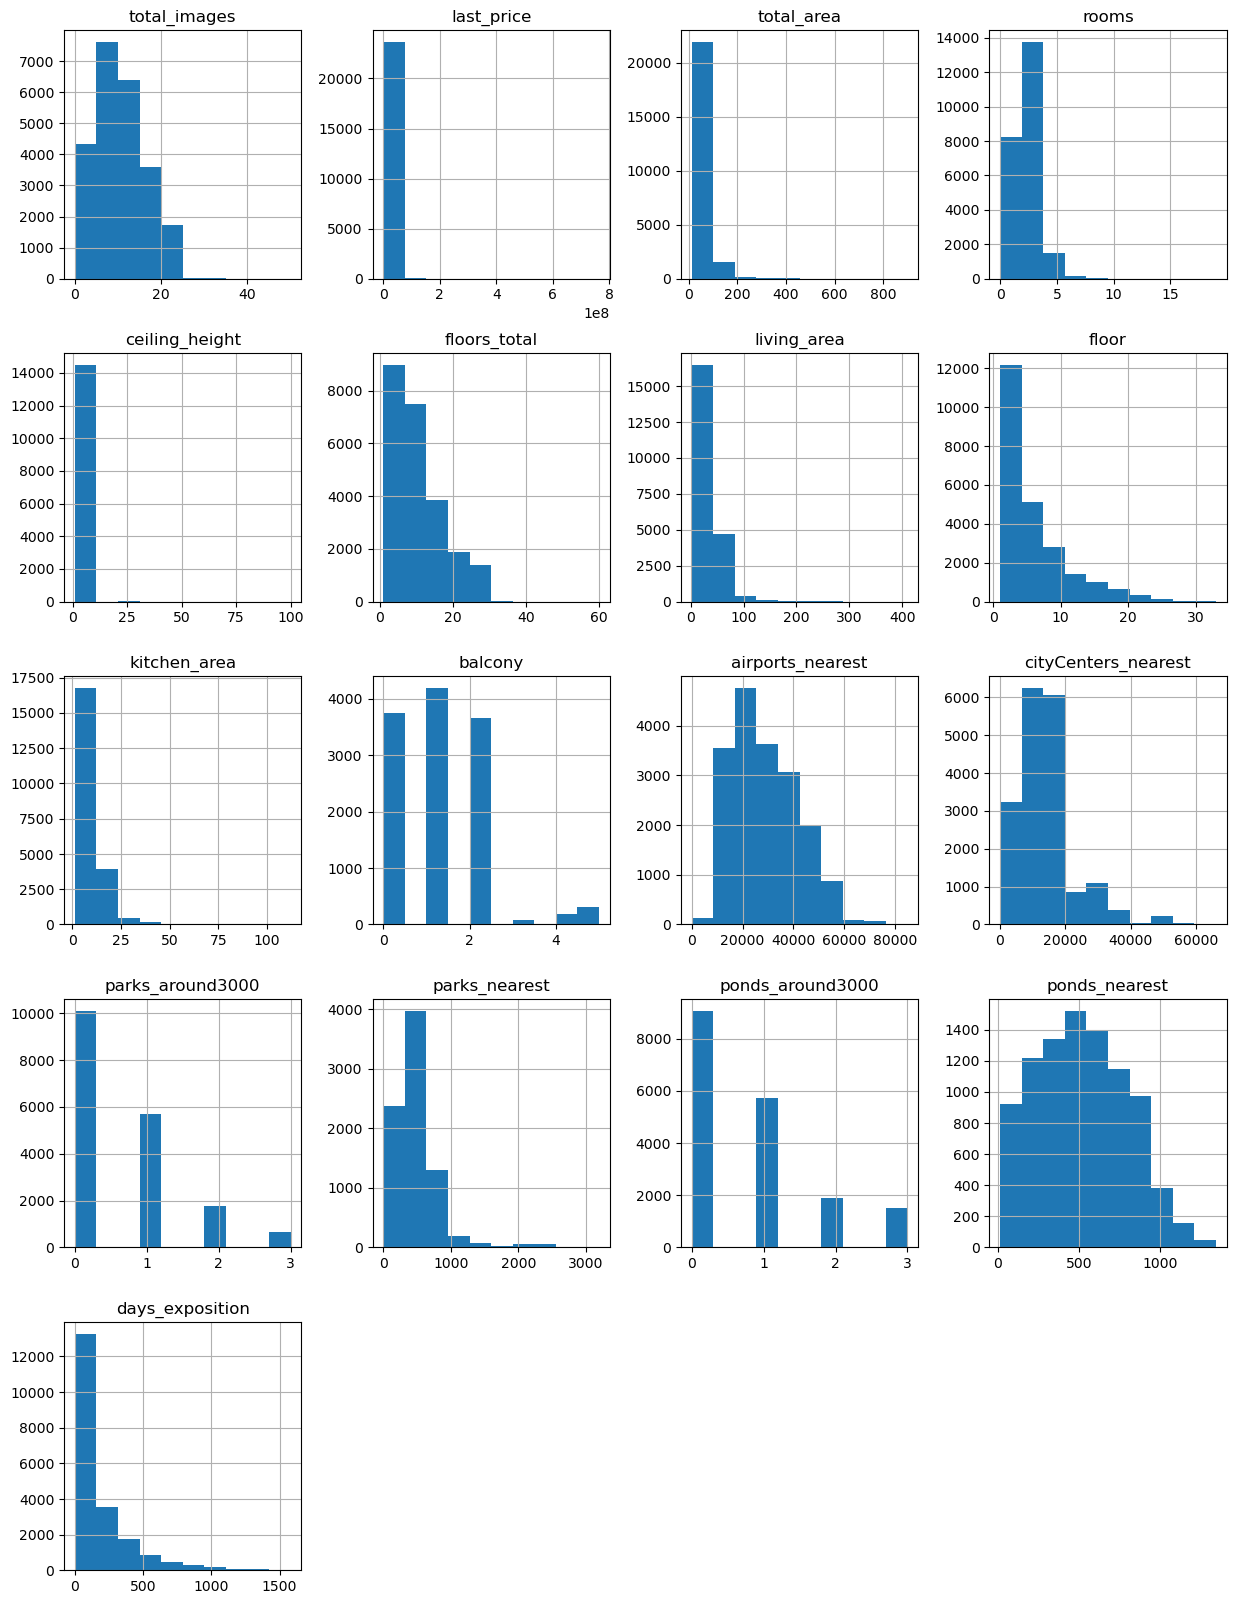

In [5]:
data.hist(figsize=(15, 20))
plt.show()

There were 17 histograms in total. The remaining 5 columns are of the bool or object value type.

It is immediately clear from the histograms that those related to the area, price and ceiling height are knocked out. The ceiling height data reaches 100 m, which is clearly an error. This may be due to the fact that some data may be specified in decimeters rather than meters. The price and area may well be real, but rare. This data may just have to be deleted.



# Data preprocessing

## Find and examine the missing values in the columns:

### Determine which columns have missing values.

To do this, check the gaps with the isnan() function. The sum in this case will give us the number of gaps in each column. After that, we will sort it for clarity.

In [6]:
data.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

We see the most omissions in the is_apartment column. The type of values in this cell is bool. Let's assume that the absence of a value means False. Let's check how the values are distributed now.

In [7]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

We see only 50 True values. Fill in the rest with False values.

In [8]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Let's check the distribution of values after filling in the missing ones

In [9]:
data['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

Next, let's pay attention to the balcony column. Suppose that the absence of a value means the absence of a balcony. Let's check how the values are distributed now.

In [10]:
data['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

Fill in the empty values with zeros

In [11]:
data['balcony'] = data['balcony'].fillna(0)

Let's check the distribution of values after filling in the missing ones

In [12]:
data['balcony'].value_counts()

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

Everything is as planned. The number of apartments without a balcony has increased, the rest are unchanged.

There are missing values in the parks_around3000 and parks_nearest columns. These columns are logically linked, so we will select from the dataframe only those rows in which the parks_nearest values are omitted. Let's see how the values in the parks_around3000 column are distributed.

In [13]:
data[data['parks_nearest'].isna()]['parks_around3000'].value_counts()

0.0    10102
Name: parks_around3000, dtype: int64

As you can see, in those rows where the parks_nearest values are skipped, in the parks_around3000 column the values are either also skipped or take the values 0. Let's check how many rows in which the values in both columns are skipped.

In [14]:
data[(data['parks_nearest'].isna()) & (data['parks_around3000'].isna())]['rooms'].count()

5518

The number of missing values is the same as the total number of missing values in the parks_around 3000 column. In other words, it can be concluded that the respondents did not fill in both columns due to the lack of parks nearby. Fill in the missing values in the parks_around 3000 column with zeros.

In [15]:
data['parks_around3000'] = data['parks_around3000'].fillna(0.0)

Let's check the number of values in the parks_around3000 column

In [16]:
data['parks_around3000'].count()

23699

There was also an idea to fill the empty cells in the parks_nearest column with values like '>3000', but I decided to abandon it

Let's do the same with the columns ponds_nearest and ponds_around3000

In [17]:
data[data['ponds_nearest'].isna()]['ponds_around3000'].value_counts()

0.0    9071
Name: ponds_around3000, dtype: int64

As you can see, in those rows where the ponds_nearest values are omitted, in the ponds_around3000 column the values are either also omitted or take the values 0. Let's check how many rows in which the values in both columns are omitted.

In [18]:
data[(data['ponds_nearest'].isna()) & (data['ponds_around3000'].isna())]['rooms'].count()

5518

The number of missing values is the same as the total number of missing values in the sounds_around3000 column. In other words, it can be concluded that the respondents did not fill in both columns due to the lack of parks nearby. Fill in the gaps in the ponds_around3000 column with zeros.

In [19]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0.0)

Let's check the number of values in the parks_around3000 column

In [20]:
data['ponds_around3000'].count()

23699

Let's fill in the gaps in the column with the ceiling height, especially since we can restore them fairly accurately since the bulk of the data in this column is in a small range.

In [21]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [22]:
data['ceiling_height'].count()

23699

## Look at the data types in each column

### Let's output information about the data type in each column. The first thing that catches your eye is the data type in the first_day_exposition column. Let's change it to datetime64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [24]:
data['first_day_exposition'].head()

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object

In [25]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M')

Let's check if the data type has changed

In [26]:
data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

The data display and its type has changed. This was done so that in the future it would be possible to perform calculations and apply functions to them.

### Let's change the data type in the columns balcony, park_around3000, sounds_around3000 from float64 to int64. I would also like to replace the data type in the floors_total, days_exposition columns, but the data in these columns is incomplete

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

Let's create a list of necessary columns

In [28]:
list_of_int = ['balcony', 'parks_around3000', 'ponds_around3000']

Let's change the data type using astype()

In [29]:
for col in list_of_int:
    data[col] = data[col].astype('int32')

Let's check the data type

In [30]:
data.loc[:, list_of_int].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   balcony           23699 non-null  int32
 1   parks_around3000  23699 non-null  int32
 2   ponds_around3000  23699 non-null  int32
dtypes: int32(3)
memory usage: 277.8 KB


The data changed its type, as we wanted. This was done for the reasons that these data can only be integers.

In [31]:
for col in data.columns:
    if str(data[col].dtype) == 'float64':
        data[col] = data[col].astype('float32')
    elif str(data[col].dtype) == 'int64':
        data[col] = data[col].astype('int32')

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int32         
 1   last_price            23699 non-null  float32       
 2   total_area            23699 non-null  float32       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int32         
 5   ceiling_height        23699 non-null  float32       
 6   floors_total          23613 non-null  float32       
 7   living_area           21796 non-null  float32       
 8   floor                 23699 non-null  int32         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float32       
 13  balcony         

## Examine the unique values in the column with names and eliminate implicit duplicates

Let's look at the unique values in the locality_name column

In [33]:
list_of_unique_locs = sorted(list(data['locality_name'].dropna().unique()))
list_of_unique_locs

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

Let's create a loop with which we will create a list consisting only of the last words in the names of locations.

In [34]:
last_names_of_locs = []
for name in list_of_unique_locs:
    last_names_of_locs.append(name.split(' ')[-1])

Let's sort this list and write down in a separate list those that were repeated

In [35]:
print('The number of unique values:', len(sorted(last_names_of_locs)))
print()
print(sorted(last_names_of_locs))

The number of unique values: 364

['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аннино', 'Аро', 'Барышево', 'Батово', 'Бегуницы', 'Бегуницы', 'Белогорка', 'Белоостров', 'Бокситогорск', 'Бор', 'Бор', 'Бор', 'Бор', 'Бор', 'Бор', 'Бор', 'Бор', 'Бугры', 'Бугры', 'Будогощь', 'Ваганово', 'Важины', 'Вартемяги', 'Верево', 'Вещево', 'Вещево', 'Виллози', 'Вознесенье', 'Возрождение', 'Возрождение', 'Войсковицы', 'Войскорово', 'Володарское', 'Волосово', 'Волхов', 'Вруда', 'Всеволожск', 'Выборг', 'Вырица', 'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово', 'Гаврилово', 'Гарболово', 'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево', 'Глинка', 'Гончарово', 'Горбунки', 'Горка', 'Горка', 'Гостилицы', 'Грива', 'Громово', 'Громово', 'Девяткино', 'Дзержинского', 'Долина', 'Дружноселье', 'Дубровка', 'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилгородок', 'Жилпосёлок', 'Житково', 'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск', 'Зимитицы', 'Зимитицы', 'Иванг

In [36]:
last_names_of_locs_unique = []
for name in last_names_of_locs:
    if last_names_of_locs.count(name) > 1:
        last_names_of_locs_unique.append(name)
last_names_of_locs_unique = set(last_names_of_locs_unique)

In [37]:
len(last_names_of_locs_unique)
print('The number of unique values:', len(sorted(last_names_of_locs_unique)))
print()
print(sorted(last_names_of_locs_unique))

The number of unique values: 60

['Аннино', 'Бегуницы', 'Бор', 'Бугры', 'Вещево', 'Возрождение', 'Вырица', 'Гаврилово', 'Гарболово', 'Горка', 'Громово', 'Жилгородок', 'Зимитицы', 'Ижора', 'Ильичёво', 'Калитино', 'Кобралово', 'Колпаны', 'Коробицыно', 'Кудрово', 'Кузьмоловский', 'Ладога', 'Лебяжье', 'Лесное', 'Лесогорский', 'Любань', 'Малукса', 'Мга', 'Мельниково', 'Мичуринское', 'Мурино', 'Назия', 'Никольское', 'Нос', 'Павлово', 'Перово', 'Петровское', 'Победа', 'Поляны', 'Приветнинское', 'Приладожский', 'Рабитицы', 'Рахья', 'Романовка', 'Ропша', 'Рощино', 'Рябово', 'Свердлова', 'Свет', 'Советский', 'Стеклянный', 'Сумино', 'Тельмана', 'Терволово', 'Токсово', 'Усть-Луга', 'Форносово', 'Фёдоровское', 'Щеглово', 'Янино-1']


We found that in the column with the names of settlements there are 60 last words that are repeated. It seems that decisions on combining names will have to be made individually for each case. To do this, we will create another loop that will output similar names

In [38]:
list_of_similar_names = []
for name in last_names_of_locs_unique:
    local_list = []
    for full_name in list_of_unique_locs:
        if name in full_name:
            local_list.append(full_name)
    list_of_similar_names.append(local_list)
print(*list_of_similar_names, sep='\n')

['поселок Гаврилово', 'посёлок Гаврилово']
['городской посёлок Советский', 'поселок городского типа Советский']
['деревня Бегуницы', 'деревня Старые Бегуницы']
['деревня Зимитицы', 'поселок Зимитицы']
['поселок Коробицыно', 'посёлок Коробицыно']
['поселок станции Приветнинское', 'посёлок при железнодорожной станции Приветнинское']
['поселок Перово', 'посёлок Перово']
['Любань', 'поселок Любань']
['поселок городского типа Дружная Горка', 'посёлок Форт Красная Горка']
['поселок городского типа Форносово', 'посёлок городского типа Форносово']
['Новая Ладога', 'село Старая Ладога']
['поселок городского типа Кузьмоловский', 'посёлок городского типа Кузьмоловский']
['поселок Кобралово', 'посёлок Кобралово']
['поселок Лисий Нос', 'посёлок Лисий Нос']
['поселок городского типа Лебяжье', 'посёлок городского типа Лебяжье']
['деревня Малая Романовка', 'поселок Романовка']
['деревня Щеглово', 'посёлок Щеглово']
['поселок Ильичёво', 'посёлок Ильичёво']
['городской посёлок Лесогорский', 'поселок гор

According to this list, we see that there are a lot of discrepancies due to the letters 'e' и 'ё'. Replace all the 'ё' with 'е'.

In [39]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True)

ЕWe also see that urban-type settlements can be written as 'городской поселок' and 'поселок городского типа'. Let's bring this to the common name 'ПГТ'.

In [40]:
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'ПГТ', regex=True)
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'ПГТ', regex=True)

Let's repeat the code to determine if there are any remaining name matches.

In [41]:
list_of_unique_locs = sorted(list(data['locality_name'].dropna().unique()))
last_names_of_locs = []
for name in list_of_unique_locs:
    last_names_of_locs.append(name.split(' ')[-1])
last_names_of_locs_unique = []
for name in last_names_of_locs:
    if last_names_of_locs.count(name) > 1:
        last_names_of_locs_unique.append(name)
last_names_of_locs_unique = set(last_names_of_locs_unique)
list_of_similar_names = []
for name in last_names_of_locs_unique:
    local_list = []
    for full_name in list_of_unique_locs:
        if name in full_name:
            local_list.append(full_name)
    list_of_similar_names.append(local_list)
print('The number of similar names: ', len(list_of_similar_names))
print()
print(*list_of_similar_names, sep='\n')

The number of similar names:  25

['деревня Бегуницы', 'деревня Старые Бегуницы']
['деревня Зимитицы', 'поселок Зимитицы']
['ПГТ Федоровское', 'деревня Федоровское']
['поселок при железнодорожной станции Приветнинское', 'поселок станции Приветнинское']
['Любань', 'поселок Любань']
['ПГТ Дружная Горка', 'поселок Форт Красная Горка']
['Новая Ладога', 'село Старая Ладога']
['деревня Малая Романовка', 'поселок Романовка']
['деревня Щеглово', 'поселок Щеглово']
['поселок при железнодорожной станции Вещево', 'поселок станции Вещево']
['поселок Громово', 'поселок станции Громово']
['деревня Гарболово', 'поселок Гарболово']
['деревня Большие Колпаны', 'деревня Малые Колпаны']
['деревня Рабитицы', 'поселок Рабитицы']
['Никольское', 'село Никольское']
['ПГТ Павлово', 'село Павлово']
['ПГТ Рахья', 'садовое товарищество Рахья']
['деревня Калитино', 'поселок Калитино']
['ПГТ Приладожский', 'садовое товарищество Приладожский']
['ПГТ Рябово', 'поселок Рябово']
['ПГТ Красный Бор', 'Сосновый Бор', 'дер

Дальше буду изменять те наименования, которые посчитал одинаковыми. Решил не приравнивать друг к другу село, поселок и деревню. При этом взглянул на список населенных пунктов Ленинградской области, и убедился в том, что существуют примеры одинаково названных поселком и деревень в рамках одной области.
Next, I will change the names that I considered the same. I decided not to equate the село, поселок и деревня with each other. At the same time, I looked at the list of settlements in the Leningrad region, and I was convinced that there are examples of equally named settlements and villages within the same region.

In [42]:
data['locality_name'] = data['locality_name'].str.replace('поселок Мурино', 'Мурино', regex=True)
data['locality_name'] = data['locality_name'].str.replace('поселок Рябово', 'ПГТ Рябово', regex=True)
data['locality_name'] = data['locality_name'].str.replace('село Никольское', 'Никольское', regex=True)
data['locality_name'] = data['locality_name'].str.replace('деревня Кудрово', 'Кудрово', regex=True)
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок Лесное', 'поселок Лесное', regex=True)
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции Вещево', 'поселок станции Вещево', regex=True)
data['locality_name'] = data['locality_name'].str.replace('поселок станции Громово', 'поселок Громово', regex=True)
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции Приветнинское', 'поселок станции Приветнинское', regex=True)
data['locality_name'] = data['locality_name'].str.replace('поселок Любань', 'Любань', regex=True)

### Find and eliminate rare and erratic values

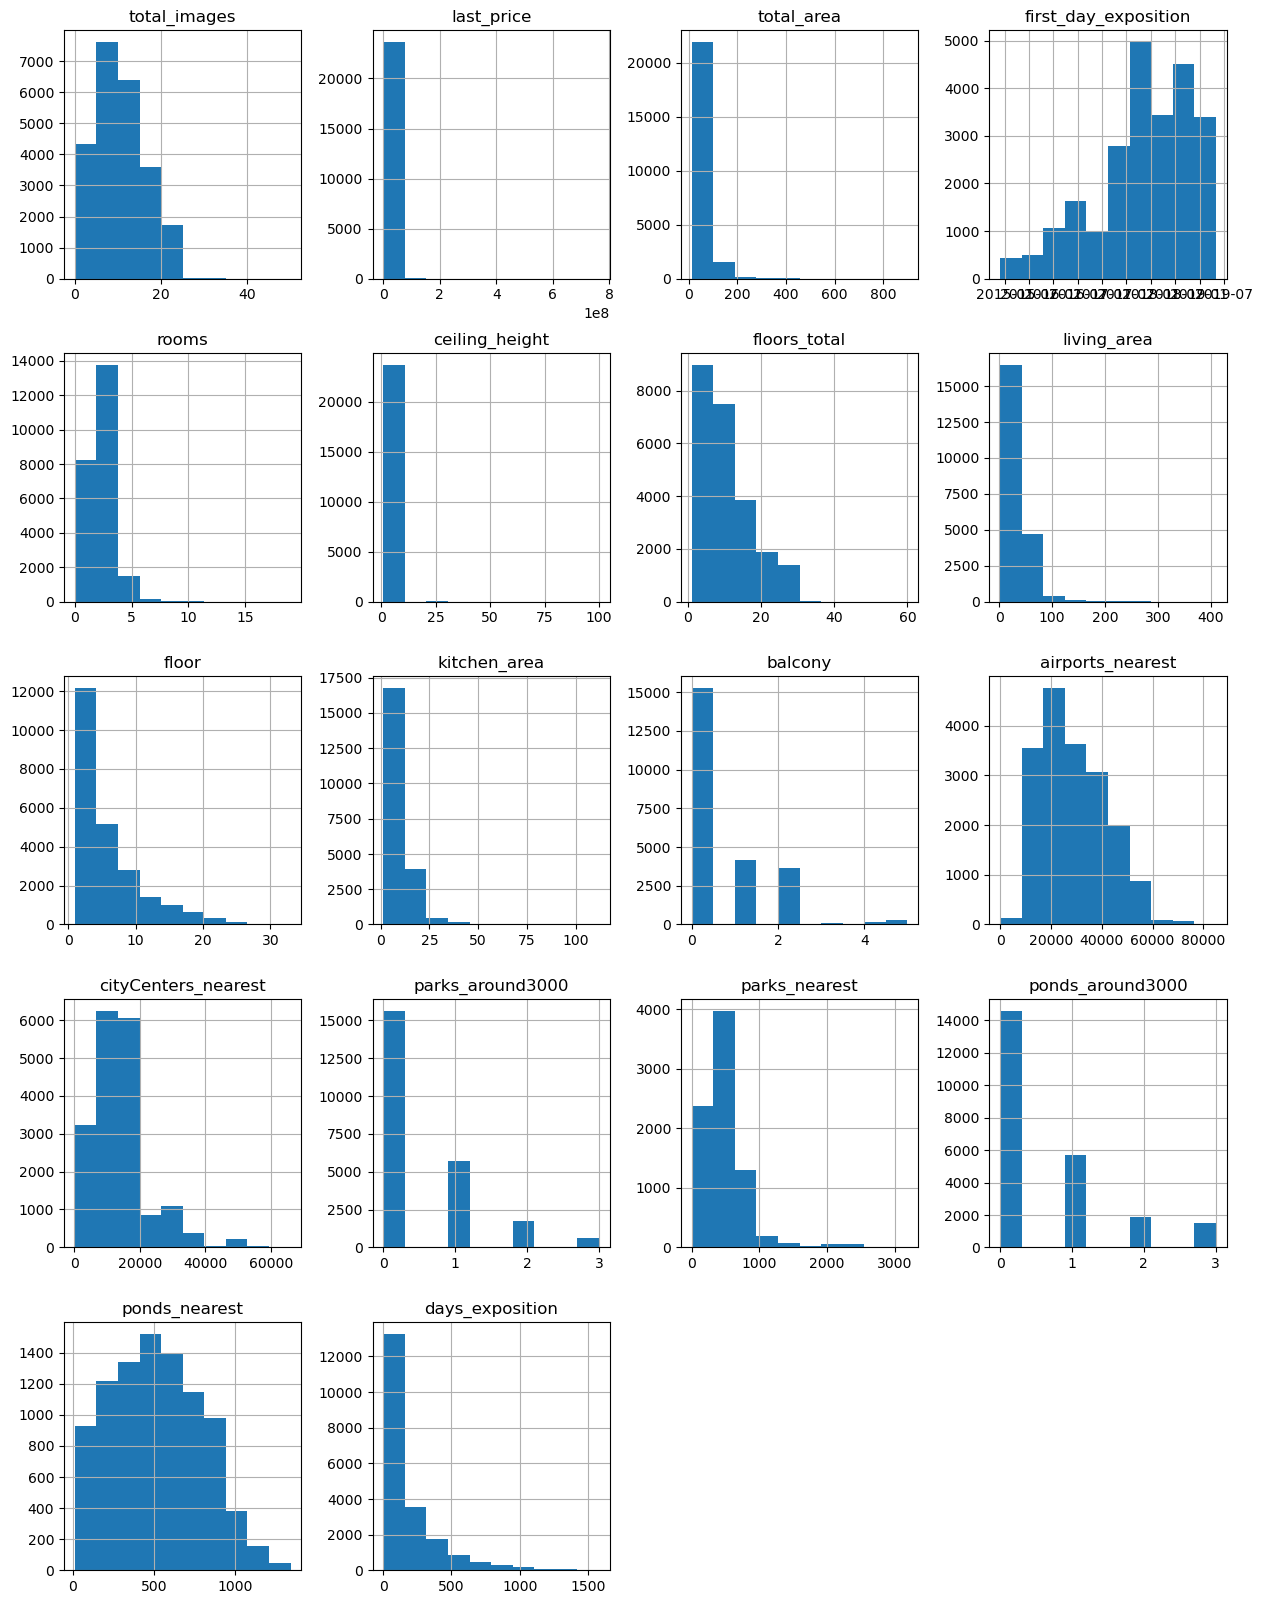

In [43]:
data.hist(figsize=(15, 20))
plt.show()

In [44]:
length_initial = data.shape[0]
length_initial

23699

In [45]:
data['ceiling_height'].sort_values(ascending=False).head()

22869    100.0
3148      32.0
22336     32.0
21377     27.5
4876      27.0
Name: ceiling_height, dtype: float32

Let's delete the row in which the ceiling height is 100 from the data.

In [46]:
data = data.query('ceiling_height != 100')

Divide the values greater than 20 by 10

In [47]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] / 10

In [48]:
data['ceiling_height'].sort_values(ascending=False).head(15)

15061    14.0
22309    10.3
5863      8.3
17442     8.0
3474      8.0
15743     8.0
20264     6.0
21227     5.8
1388      5.6
7578      5.5
12628     5.3
1026      5.3
464       5.2
1053      5.0
21923     4.9
Name: ceiling_height, dtype: float32

We will delete values greater than 8 meters

In [49]:
drop = [8, 8.3, 10.3, 14.0, 1.0, 1.2, 1.75, 2.0]
for num in drop:
    data = data[data['ceiling_height'] != num]

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23677 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23677 non-null  int32         
 1   last_price            23677 non-null  float32       
 2   total_area            23677 non-null  float32       
 3   first_day_exposition  23677 non-null  datetime64[ns]
 4   rooms                 23677 non-null  int32         
 5   ceiling_height        23677 non-null  float32       
 6   floors_total          23591 non-null  float32       
 7   living_area           21776 non-null  float32       
 8   floor                 23677 non-null  int32         
 9   is_apartment          23677 non-null  bool          
 10  studio                23677 non-null  bool          
 11  open_plan             23677 non-null  bool          
 12  kitchen_area          21403 non-null  float32       
 13  balcony         

In [51]:
data['ceiling_height'].sort_values(ascending=False)

20264    6.00
21227    5.80
1388     5.60
7578     5.50
12628    5.30
         ... 
5498     2.30
1582     2.30
20507    2.26
17794    2.25
12755    2.20
Name: ceiling_height, Length: 23677, dtype: float32

The histogram for the last_price column looks strange. Let's look at the 15 most expensive apartments

In [52]:
data['last_price'].sort_values(ascending=False).head(15)

12971    763000000.0
19540    420000000.0
14706    401300000.0
1436     330000000.0
15651    300000000.0
22831    289238400.0
16461    245000000.0
13749    240000000.0
5893     230000000.0
8900     190870000.0
19865    180000000.0
19155    160000000.0
2536     159984000.0
16495    159000000.0
1026     155000000.0
Name: last_price, dtype: float32

In [53]:
data[data['last_price'] > 240000000.0].sort_values('last_price', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12971,19,763000000.0,400.000000,2017-09-30,7,2.65,10.0,250.000000,10,False,False,False,NaN,2,Санкт-Петербург,25108.0,3956.0,1,530.0,3,756.0,33.0
19540,8,420000000.0,900.000000,2017-12-06,12,2.80,25.0,409.700012,25,False,False,False,112.000000,0,Санкт-Петербург,30706.0,7877.0,0,NaN,2,318.0,106.0
14706,15,401300000.0,401.000000,2016-02-20,5,2.65,9.0,204.000000,9,False,False,False,24.000000,3,Санкт-Петербург,21912.0,2389.0,1,545.0,1,478.0,393.0
1436,19,330000000.0,190.000000,2018-04-04,3,3.50,7.0,95.000000,5,False,False,False,40.000000,0,Санкт-Петербург,23011.0,1197.0,3,519.0,3,285.0,233.0
15651,20,300000000.0,618.000000,2017-12-18,7,3.40,7.0,258.000000,5,False,False,False,70.000000,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,111.0
22831,18,289238400.0,187.500000,2019-03-19,2,3.37,6.0,63.700001,6,False,False,False,30.200001,0,Санкт-Петербург,22494.0,1073.0,3,386.0,3,188.0,NaN
16461,17,245000000.0,285.700012,2017-04-10,6,3.35,7.0,182.800003,4,False,False,False,29.799999,0,Санкт-Петербург,33143.0,6235.0,3,400.0,3,140.0,249.0


Judging by the area of the apartments, the city and other parameters, such a price for an apartment cannot be excluded

In [54]:
data['last_price'].sort_values(ascending=True).head(15)

8793      12190.0
17456    430000.0
14911    430000.0
16274    440000.0
5698     450000.0
17676    450000.0
9581     450000.0
16219    450000.0
23484    470000.0
18867    470000.0
21912    470000.0
16032    480000.0
6859     490000.0
10782    490000.0
14295    500000.0
Name: last_price, dtype: float32

In [55]:
data[data['last_price'] < 500000].sort_values('last_price')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.000000,2019-03-20,2,2.75,25.0,32.000000,25,False,False,False,40.5,0,Санкт-Петербург,36421.0,9176.0,1,805.0,0,NaN,8.0
14911,5,430000.0,54.000000,2018-06-26,2,2.65,3.0,NaN,3,False,False,False,NaN,0,поселок станции Свирь,NaN,NaN,0,NaN,0,NaN,44.0
17456,7,430000.0,30.400000,2019-04-22,1,2.65,2.0,16.000000,1,False,False,False,6.0,0,Сланцы,NaN,NaN,0,NaN,0,NaN,NaN
16274,18,440000.0,40.000000,2018-07-10,1,2.65,5.0,NaN,1,False,False,False,NaN,0,деревня Старополье,NaN,NaN,0,NaN,0,NaN,45.0
5698,7,450000.0,42.000000,2017-07-31,2,2.65,1.0,23.000000,1,False,False,False,5.8,0,ПГТ Будогощь,NaN,NaN,0,NaN,0,NaN,233.0
9581,7,450000.0,43.400002,2018-08-31,2,2.65,5.0,30.299999,3,False,False,False,5.5,0,деревня Старополье,NaN,NaN,0,NaN,0,NaN,96.0
16219,14,450000.0,38.500000,2018-07-11,2,2.65,2.0,NaN,1,False,False,False,NaN,0,деревня Вахнова Кара,NaN,NaN,0,NaN,0,NaN,45.0
17676,0,450000.0,36.500000,2018-02-01,1,2.65,5.0,17.299999,4,False,False,False,8.5,1,деревня Ям-Тесово,NaN,NaN,0,NaN,0,NaN,120.0
18867,1,470000.0,41.000000,2018-02-11,1,2.65,5.0,32.000000,3,False,False,False,9.0,0,деревня Выскатка,NaN,NaN,0,NaN,0,NaN,46.0
21912,0,470000.0,37.000000,2018-02-18,1,2.65,3.0,NaN,3,False,False,False,NaN,0,поселок Совхозный,NaN,NaN,0,NaN,0,NaN,45.0


Delete the line with the price for the apartment 12190

In [56]:
data = data[data['last_price'] != 12190.0]

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23676 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23676 non-null  int32         
 1   last_price            23676 non-null  float32       
 2   total_area            23676 non-null  float32       
 3   first_day_exposition  23676 non-null  datetime64[ns]
 4   rooms                 23676 non-null  int32         
 5   ceiling_height        23676 non-null  float32       
 6   floors_total          23590 non-null  float32       
 7   living_area           21775 non-null  float32       
 8   floor                 23676 non-null  int32         
 9   is_apartment          23676 non-null  bool          
 10  studio                23676 non-null  bool          
 11  open_plan             23676 non-null  bool          
 12  kitchen_area          21402 non-null  float32       
 13  balcony         

Let's delete the data in the last_price, total_area and ceiling_height columns that exceed the median value + 3 standard values

In [58]:
median_plus_3_std_price = data['last_price'].median() + 3 * data['last_price'].std()
median_plus_3_std_price

37324626.0

In [59]:
median_plus_3_std_area = data['total_area'].median() + 3 * data['total_area'].std()
median_plus_3_std_area

158.99338912963867

In [60]:
median_plus_3_std_ceiling = data['ceiling_height'].median() + 3 * data['ceiling_height'].std()
median_plus_3_std_ceiling

3.31199811398983

In [61]:
data = data[data['last_price'] <= median_plus_3_std_price]
data = data[data['total_area'] <= median_plus_3_std_area]
data = data[data['ceiling_height'] <= median_plus_3_std_ceiling]

In [62]:
data['last_price']

0        13000000.0
1         3350000.0
2         5196000.0
4        10000000.0
5         2890000.0
            ...    
23693     4600000.0
23695     3100000.0
23696     2500000.0
23697    11475000.0
23698     1350000.0
Name: last_price, Length: 22685, dtype: float32

Check percentage of deleted data

In [63]:
print('Percentage of deleted data:', round(100 - data.shape[0] / length_initial * 100, 2))

Percentage of deleted data: 4.28


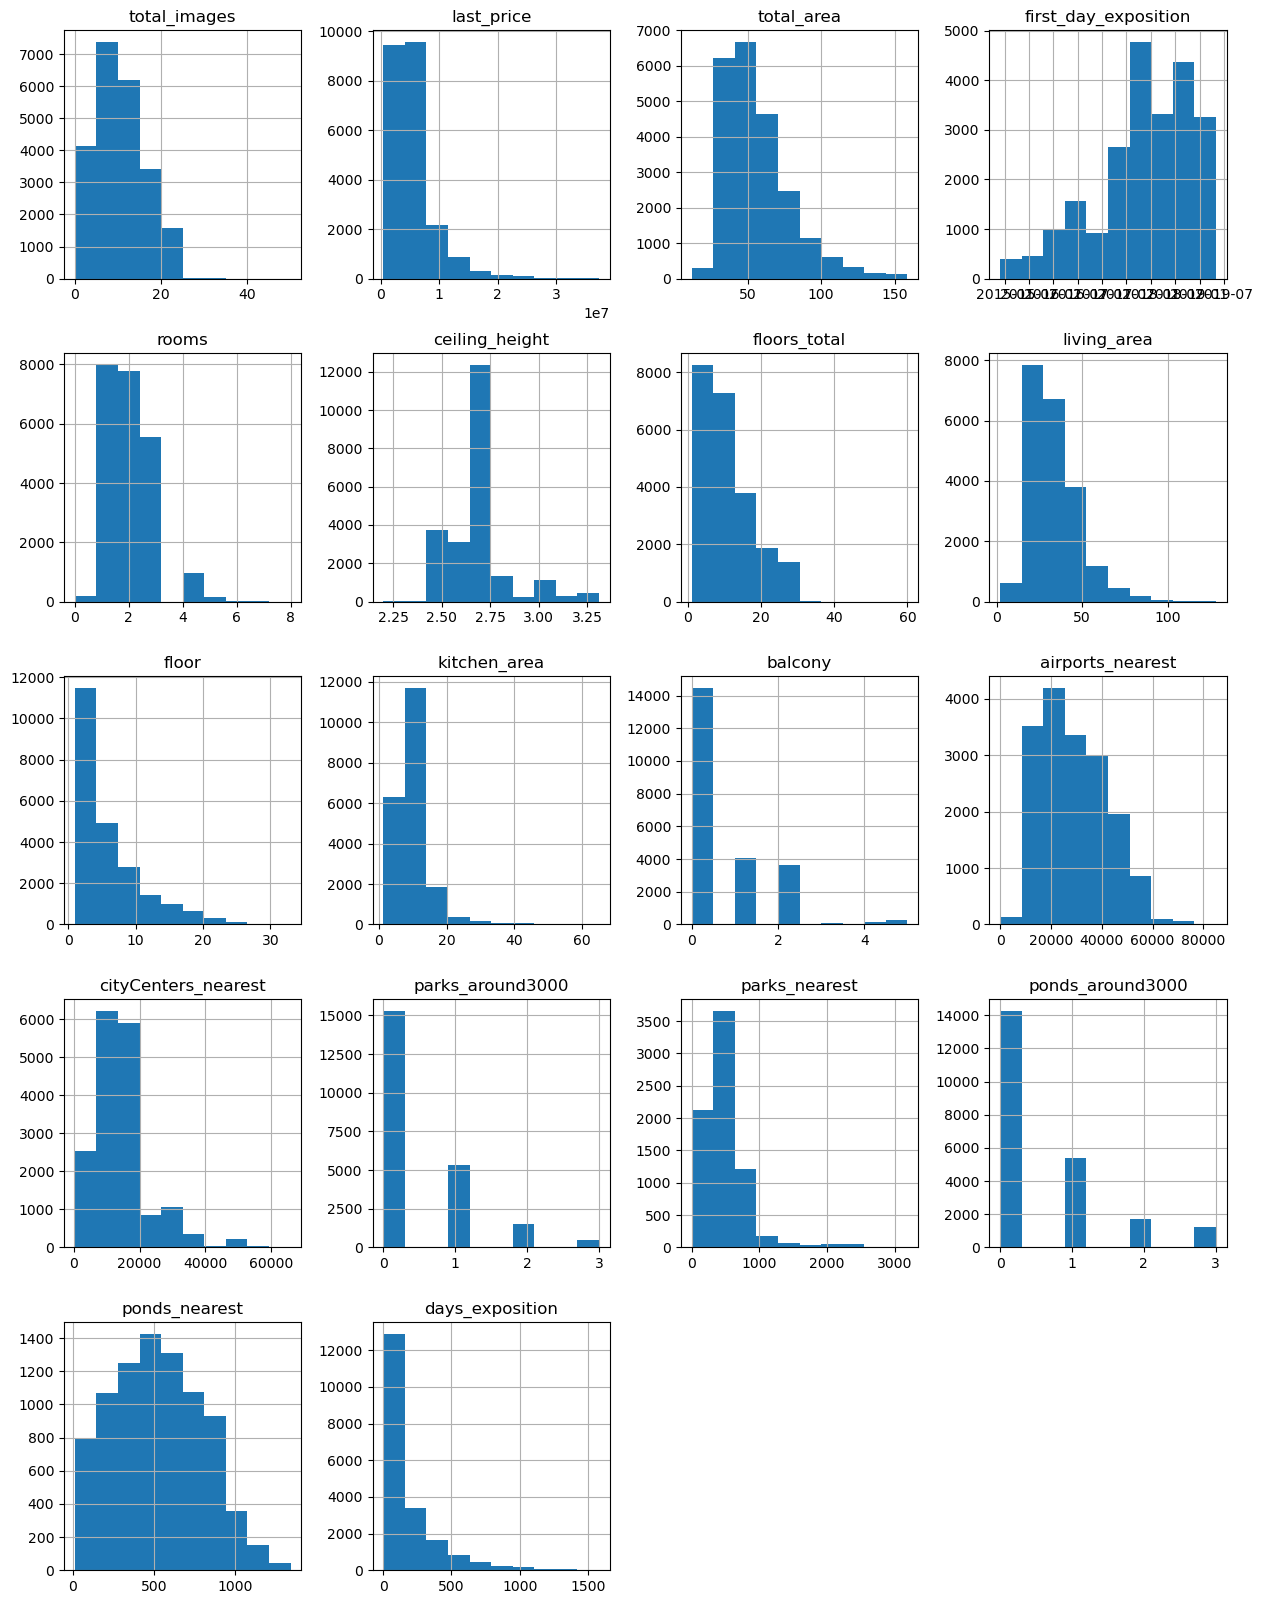

In [64]:
data.hist(figsize=(15, 20))
plt.show()

# Add new columns to the table

## The price of one meter

In [65]:
data['price_per_sq_meter'] = data['last_price'] / data['total_area']

In [66]:
data['price_per_sq_meter']

0        120370.367188
1         82920.789062
2         92785.710938
4        100000.000000
5         95065.789062
             ...      
23693     73717.945312
23695     52542.371094
23696     44091.710938
23697    149511.406250
23698     41795.667969
Name: price_per_sq_meter, Length: 22685, dtype: float32

## Day of the week

In [67]:
data['day_of_week'] = data['first_day_exposition'].dt.dayofweek

In [68]:
data[['day_of_week', 'first_day_exposition']].head()

,day_of_week,first_day_exposition
0,3,2019-03-07
1,1,2018-12-04
2,3,2015-08-20
4,1,2018-06-19
5,0,2018-09-10


I checked 2019-03-07 - it's Thursday, which corresponds to the number 3

## Month of publication

In [69]:
data['month'] = data['first_day_exposition'].dt.month

In [70]:
#check
data[['month', 'first_day_exposition']].head()

,month,first_day_exposition
0,3,2019-03-07
1,12,2018-12-04
2,8,2015-08-20
4,6,2018-06-19
5,9,2018-09-10


## Year of publication

In [71]:
data['year'] = data['first_day_exposition'].dt.year

In [72]:
#check
data[['year', 'first_day_exposition']].head()

,year,first_day_exposition
0,2019,2019-03-07
1,2018,2018-12-04
2,2015,2015-08-20
4,2018,2018-06-19
5,2018,2018-09-10


## Apartment floor type (values — "first", "last", "other")

In [73]:
data['floors_total']

0        16.0
1        11.0
2         5.0
4        14.0
5        12.0
         ... 
23693     9.0
23695     5.0
23696     3.0
23697    17.0
23698     5.0
Name: floors_total, Length: 22685, dtype: float32

In [74]:
data[data['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_meter,day_of_week,month,year
186,12,11640000.0,65.199997,2018-10-02,2,2.65,NaN,30.799999,4,False,False,False,12.000000,0,Санкт-Петербург,39197.0,12373.0,1,123.0,0,NaN,49.0,178527.609375,1,10,2018
237,4,2438033.0,28.100000,2016-11-23,1,2.65,NaN,20.750000,1,False,False,False,NaN,0,Санкт-Петербург,22041.0,17369.0,0,NaN,1,374.0,251.0,86762.742188,2,11,2016
457,4,9788348.0,70.800003,2015-08-01,2,2.65,NaN,38.400002,12,False,False,False,10.630000,0,Санкт-Петербург,37364.0,8322.0,2,309.0,2,706.0,727.0,138253.500000,5,8,2015
671,4,6051191.0,93.599998,2017-04-06,3,2.65,NaN,47.099998,8,False,False,False,16.799999,0,Санкт-Петербург,22041.0,17369.0,0,NaN,1,374.0,123.0,64649.476562,3,4,2017
1757,5,3600000.0,39.000000,2017-04-22,1,2.65,NaN,NaN,9,False,False,False,NaN,0,Санкт-Петербург,22735.0,11618.0,1,835.0,1,652.0,77.0,92307.695312,5,4,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.500000,2017-05-24,2,2.80,NaN,NaN,3,False,False,False,NaN,0,Санкт-Петербург,51340.0,15363.0,0,NaN,1,853.0,512.0,133858.265625,2,5,2017
22656,4,4574160.0,64.500000,2017-04-02,2,2.65,NaN,31.700001,20,False,False,False,14.400000,0,Санкт-Петербург,22041.0,17369.0,0,NaN,1,374.0,127.0,70917.210938,6,4,2017
22808,0,14569263.0,110.400002,2016-11-20,3,2.65,NaN,45.380001,6,False,False,False,23.420000,0,Санкт-Петербург,19095.0,4529.0,0,NaN,0,NaN,260.0,131967.953125,6,11,2016
23590,0,21187872.0,123.300003,2017-04-25,3,2.65,NaN,50.400002,18,False,False,False,23.600000,0,Санкт-Петербург,19095.0,4529.0,0,NaN,0,NaN,104.0,171840.000000,1,4,2017


In [75]:
data['floor_type'] = 'Other'

In [76]:
data.loc[data['floor'] == data['floors_total'], 'floor_type'] = data.loc[data['floor'] == data['floors_total'], 'floor_type'] = 'Last'

In [77]:
data.loc[data['floor'] == 1, 'floor_type'] = data.loc[data['floor'] == 1, 'floor_type'] = 'First'

In [78]:
data['floor_type'].unique()

array(['Other', 'First', 'Last'], dtype=object)

In [79]:
data[['floor_type', 'floor', 'floors_total']]

,floor_type,floor,floors_total
0,Other,8,16.0
1,First,1,11.0
2,Other,4,5.0
4,Other,13,14.0
5,Other,5,12.0
...,...,...,...
23693,Other,8,9.0
23695,Other,4,5.0
23696,First,1,3.0
23697,Other,12,17.0


## The distance to the city center in kilometers (convert from m to km and round to integer values)

In [80]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000

In [81]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].round()

In [82]:
data['cityCenters_nearest_km'].head()

0    16.0
1    19.0
2    14.0
4     8.0
5     NaN
Name: cityCenters_nearest_km, dtype: float32

# Exploratory data analysis

## Examine the parameters of the objects

### Total area

In [83]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'price_per_sq_meter', 'day_of_week',
       'month', 'year', 'floor_type', 'cityCenters_nearest_km'],
      dtype='object')

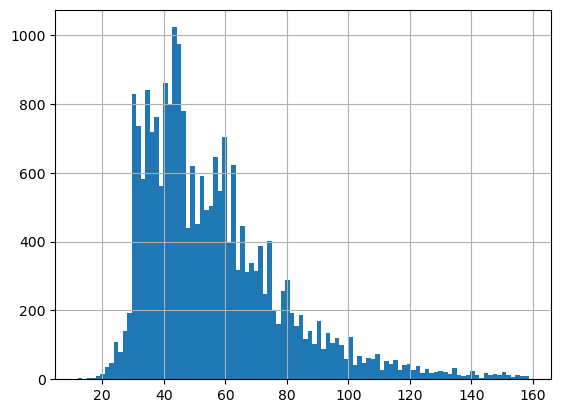

In [84]:
plt.show(data['total_area'].hist(bins=100))

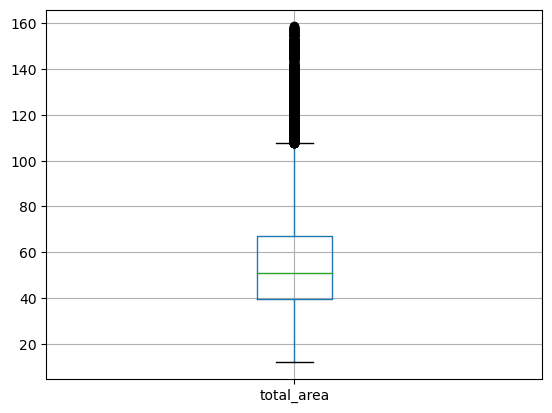

In [85]:
plt.show(data.boxplot('total_area'))

### Living area

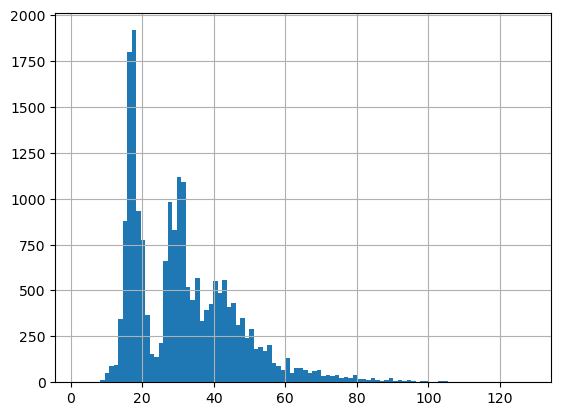

In [86]:
plt.show(data['living_area'].hist(bins=100))

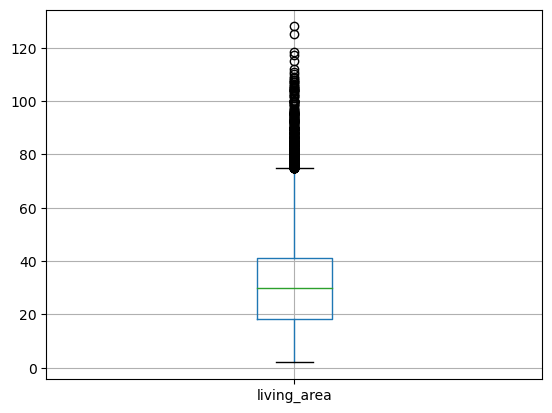

In [87]:
plt.show(data.boxplot('living_area'))

### Kitchen area

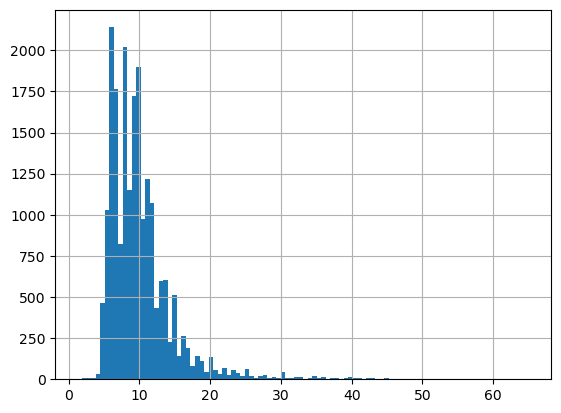

In [88]:
plt.show(data['kitchen_area'].hist(bins=100))

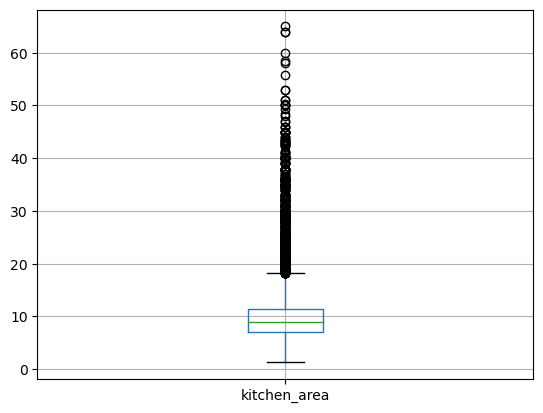

In [89]:
plt.show(data.boxplot('kitchen_area'))

### The price of the object

In [90]:
data['last_price'] = data['last_price'] / 1000000

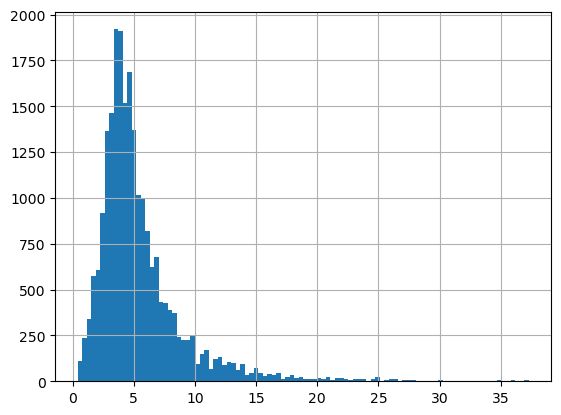

In [91]:
plt.show(data['last_price'].hist(bins=100))

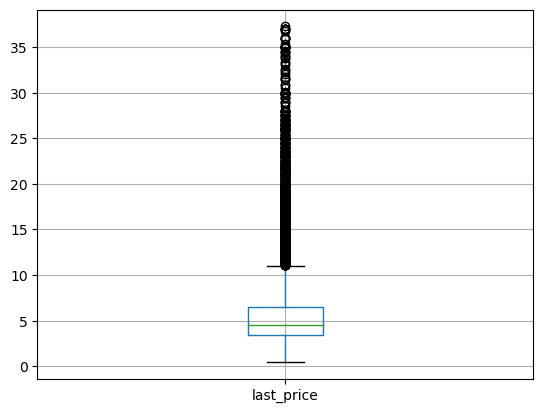

In [92]:
plt.show(data.boxplot('last_price'))

### Number of rooms

In [93]:
rooms = data['rooms'].value_counts().reset_index()
rooms

,index,rooms
0,1,7978
1,2,7791
2,3,5560
3,4,971
4,0,193
5,5,158
6,6,24
7,7,9
8,8,1


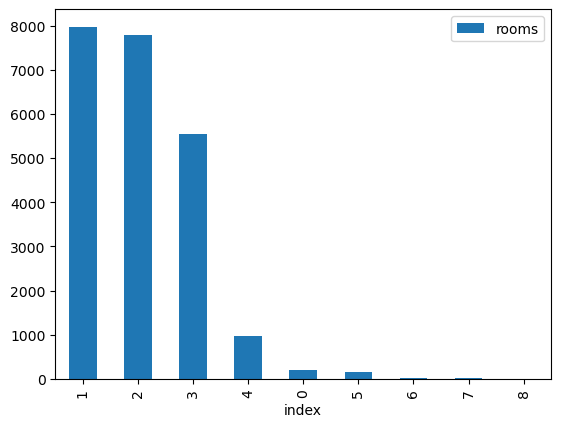

In [94]:
plt.show(rooms.plot.bar(x='index', y='rooms'))


The distribution looks logical: the more rooms there are in an apartment, the rarer such apartments are.

### Ceiling height

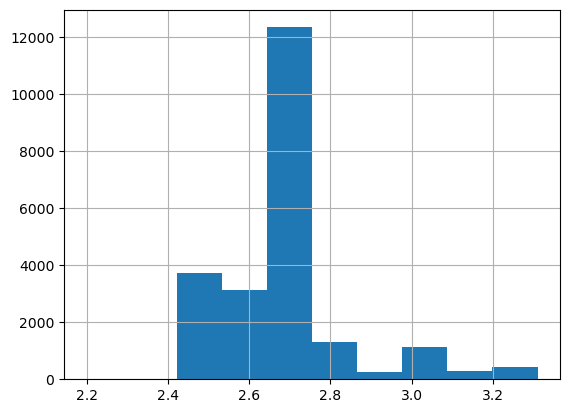

In [95]:
plt.show(data['ceiling_height'].hist())

In [96]:
data['ceiling_height'].describe()

count    22685.000000
mean         2.670006
std          0.150228
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.310000
Name: ceiling_height, dtype: float64

After deleting the data, it can be seen that the average ceiling height in the apartment is 2.67 m. with a standard deviation of 15 cm

### Apartment floor

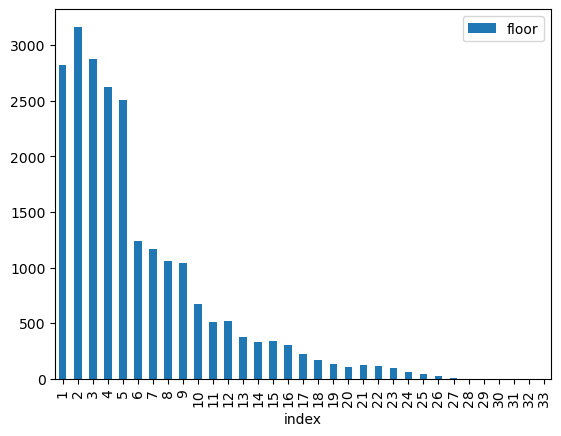

In [97]:
floor = data['floor'].value_counts().reset_index().sort_values('index')
plt.show(floor.plot.bar(x='index', y='floor'))

The distribution also looks logical. The higher the house, the less common it is and the less often we will find an apartment in such a house.

### Apartment floor type ("first", "last", "other")

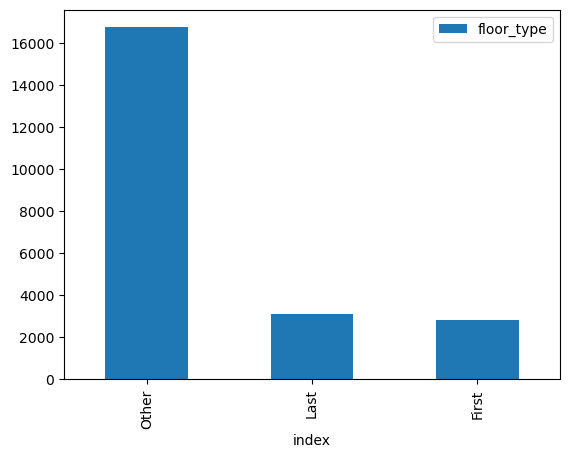

In [98]:
floor_type = data['floor_type'].value_counts().reset_index()
plt.show(floor_type.plot.bar(x='index', y='floor_type'))

It is consistent with the previous chart. There are quite a few apartments on the ground floor, but the rest are more in total

### The total number of floors in the house

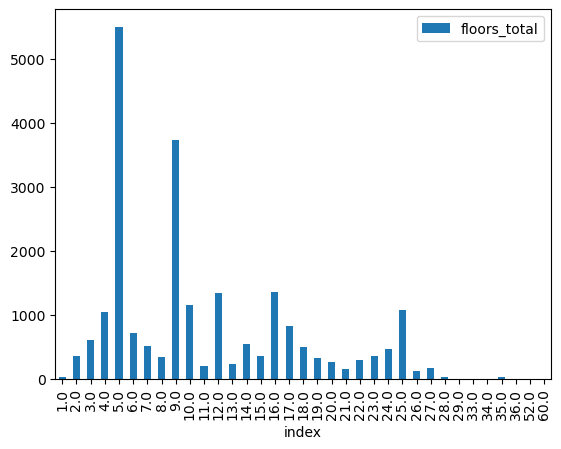

In [99]:
floors_total = data['floors_total'].value_counts().reset_index().sort_values('index')
plt.show(floors_total.plot.bar(x='index', y='floors_total'))

Most of all we see 5 and 9 storey buildings

### Distance to the city center in meters

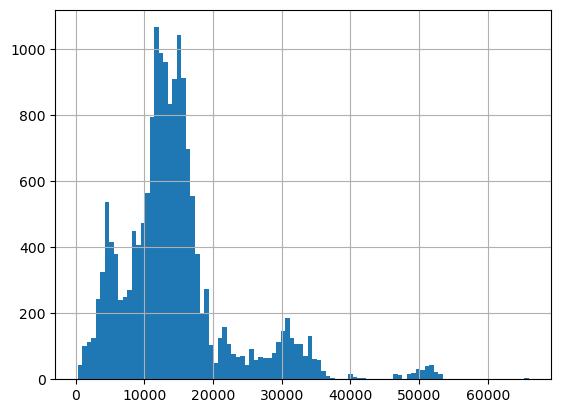

In [100]:
plt.show(data['cityCenters_nearest'].hist(bins=100))

In [101]:
data['cityCenters_nearest'].describe()

count    17213.000000
mean     14610.348633
std       8473.003906
min        287.000000
25%      10061.000000
50%      13330.000000
75%      16478.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

We see that there are huge values of more than 60 km. Most likely, the distances to the center of the nearest city indicated small settlements

### Distance to the nearest airport

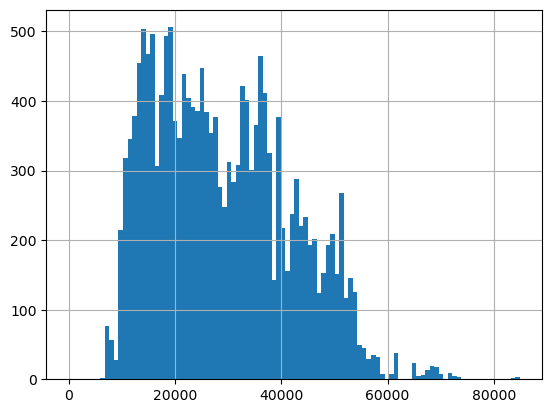

In [102]:
plt.show(data['airports_nearest'].hist(bins=100))

Here we see a slightly different distribution than in the previous histogram. There is no such obvious decrease after 20,000 m. I think this is due to the fact that city centers are more common than airports

### Distance to the nearest park

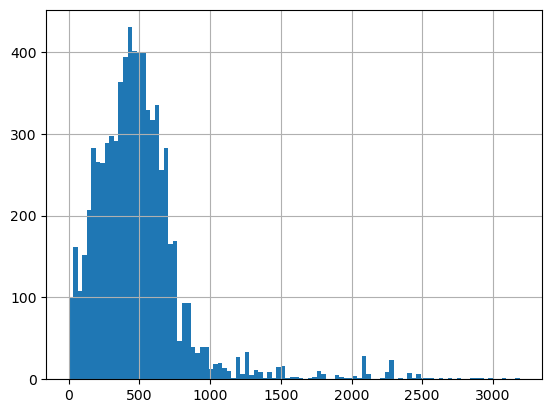

In [103]:
plt.show(data['parks_nearest'].hist(bins=100))

In [104]:
data['parks_nearest'].describe()

count    7396.000000
mean      496.021088
std       344.671661
min         1.000000
25%       292.000000
50%       456.000000
75%       616.000000
max      3190.000000
Name: parks_nearest, dtype: float64

On average, the nearest park is 500 meters from the house (if available, of course). The standard deviation is 345 m. That is, we can say that most often the park is located no further than a kilometer from the house

### Day and month of publication of the announcement

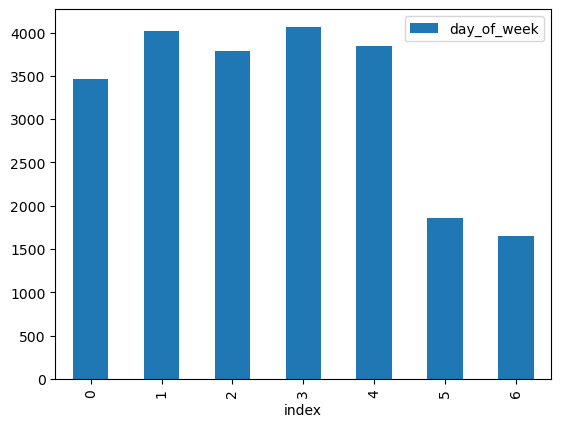

In [105]:
day = data['day_of_week'].value_counts().reset_index().sort_values('index')
plt.show(day.plot.bar(x='index', y='day_of_week'))

There are fewer applications on weekends. On weekdays, ads are distributed more evenly.

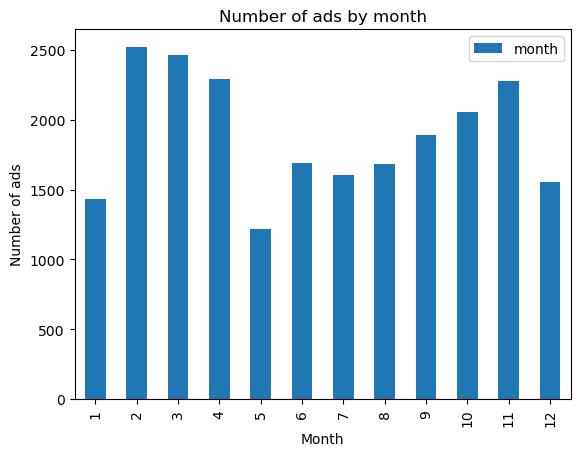

In [106]:
month = data['month'].value_counts().reset_index().sort_values('index')
fig = month.plot.bar(x='index', y='month').set_title('Number of ads by month')
plt.xlabel('Month')
plt.ylabel('Number of ads')
plt.show(fig)

There are fewer ads in January, May and December. I can assume that this is due to the large number of holidays in these months. Which is consistent with the fact that fewer ads are posted on weekends.

## Study how quickly the apartments were sold

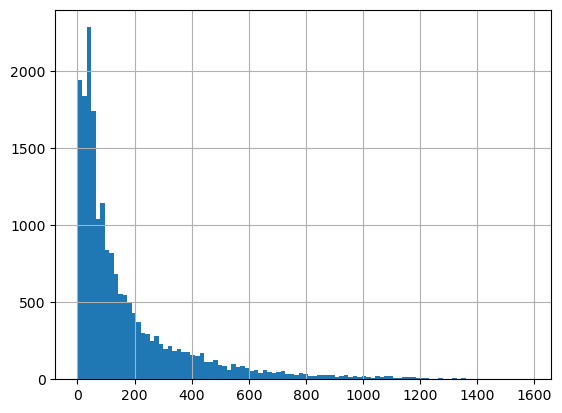

In [107]:
plt.show(data['days_exposition'].hist(bins=100))

In [108]:
data['days_exposition'].mean()

177.32655334472656

In [109]:
data['days_exposition'].median()

93.0

In [110]:
data['days_exposition'].describe()

count    19758.000000
mean       177.326553
std        215.936081
min          1.000000
25%         44.000000
50%         93.000000
75%        226.000000
max       1580.000000
Name: days_exposition, dtype: float64

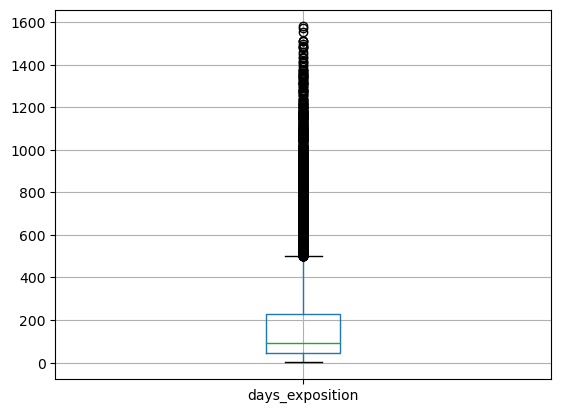

In [111]:
plt.show(data.boxplot('days_exposition'))

In half of the cases, apartments are sold from 44 to 228 days, most often in 94 days. Due to the fact that the distribution is not normal, we cannot use the average value to determine the "average rate of sale of apartments".

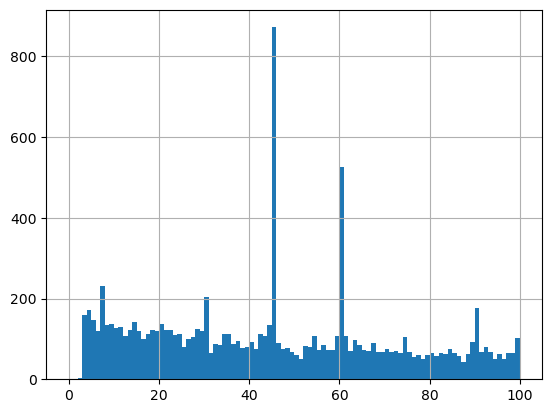

In [112]:
plt.show(data['days_exposition'].hist(range=(0, 100), bins=100))

In [113]:
data['days_exposition'].value_counts().head()

45.0    872
60.0    527
7.0     230
30.0    203
90.0    176
Name: days_exposition, dtype: int64

## What factors most affect the total (total) cost of an object?

In [114]:
cor = data[['last_price', 'total_area', 'rooms', 'living_area', 'kitchen_area', 'day_of_week', 'month', 'year', 'floor_type']].corr().round(2)
cor['last_price'].sort_values(ascending=False)

last_price      1.00
total_area      0.76
living_area     0.62
kitchen_area    0.58
rooms           0.45
month           0.00
day_of_week    -0.01
year           -0.03
Name: last_price, dtype: float64

Judging by the correlation coefficients, we can say about a fairly strong relationship between price and area (both general and residential, and kitchen area). There is also a relationship between the price and the number of rooms, but it is also related to the area. For visualization, let's build scatter plots

In [115]:
floor_grouped = data.groupby('floor').agg({'last_price': ['mean', 'median']})
floor_grouped.columns = ['mean', 'median']
floor_grouped = floor_grouped.reset_index()
floor_grouped

,floor,mean,median
0,1,4.385067,3.850
1,2,5.323447,4.300
2,3,5.525794,4.450
3,4,5.601485,4.500
4,5,5.331336,4.300
5,6,6.241899,4.950
6,7,5.909762,4.850
7,8,5.774317,4.785
8,9,5.637331,4.650
9,10,6.168548,4.999


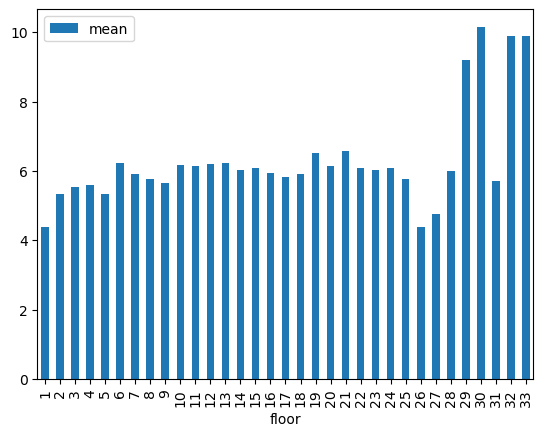

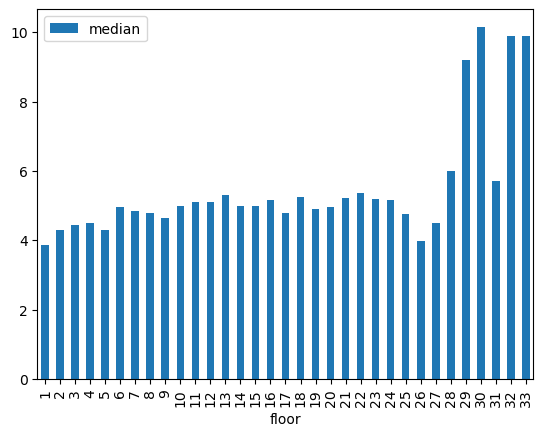

In [116]:
plt.show(floor_grouped.plot.bar(x='floor', y='mean'))
plt.show(floor_grouped.plot.bar(x='floor', y='median'))

We see that prices are distributed approximately evenly, except for 28, 29, 32, 33 floors. But as we can see from the conclusion below, these are isolated cases. That is, there is no dependence between the floor and the price.

In [117]:
floor_type_grouped = data.groupby('floor_type').agg({'last_price': ['mean', 'median']})
floor_type_grouped.columns = ['mean', 'median']
floor_type_grouped = floor_type_grouped.reset_index()
floor_type_grouped

,floor_type,mean,median
0,First,4.385067,3.85
1,Last,5.094697,4.15
2,Other,5.798132,4.70


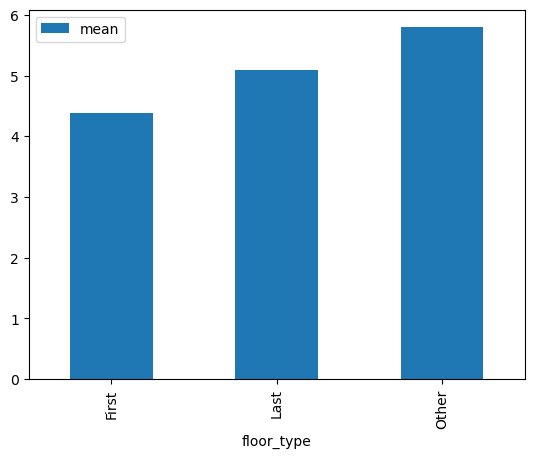

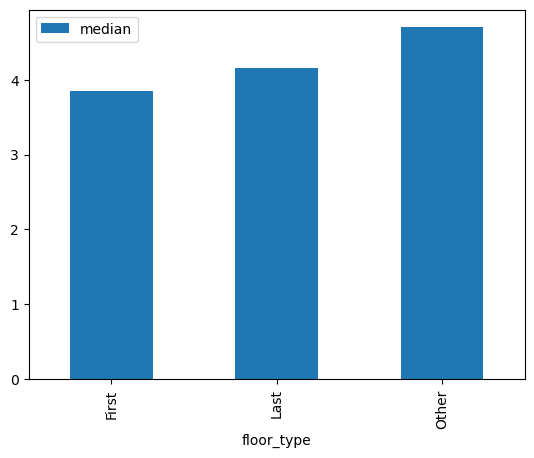

In [118]:
plt.show(floor_type_grouped.plot.bar(x='floor_type', y='mean'))
plt.show(floor_type_grouped.plot.bar(x='floor_type', y='median'))

Here we see that, on average, apartments on the ground floor are cheaper than others. The most expensive ones do not belong to the first or last floor.

In [119]:
data['floor'].value_counts().tail(10)

24    62
25    43
26    23
27    10
28     1
30     1
29     1
32     1
33     1
31     1
Name: floor, dtype: int64

Let's see how the price of an apartment changes depending on the day of publication of the announcement

In [120]:
day_grouped = data.groupby('day_of_week').agg({'last_price': ['mean', 'median']})
day_grouped.columns = ['mean', 'median']
day_grouped = day_grouped.reset_index()
day_grouped

,day_of_week,mean,median
0,0,5.521630,4.547
1,1,5.539889,4.600
2,2,5.581555,4.580
3,3,5.591575,4.500
4,4,5.504712,4.500
5,5,5.355612,4.500
6,6,5.455088,4.500


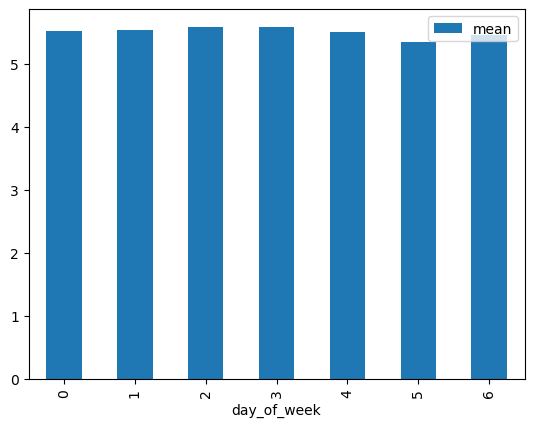

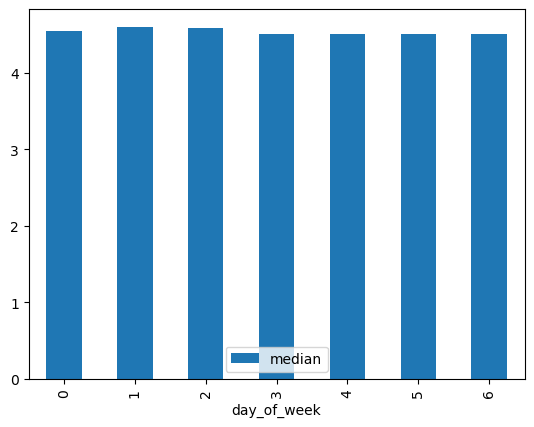

In [121]:
plt.show(day_grouped.plot.bar(x='day_of_week', y='mean'))
plt.show(day_grouped.plot.bar(x='day_of_week', y='median'))

As you can see, the price is almost the same. That is, the price does not depend on the day of the week. Let's check the influence of the month on the price.

In [122]:
month_grouped = data.groupby('month').agg({'last_price': ['mean', 'median']})
month_grouped.columns = ['mean', 'median']
month_grouped = month_grouped.reset_index()
month_grouped

,month,mean,median
0,1,5.627055,4.5000
1,2,5.469699,4.5300
2,3,5.457707,4.5500
3,4,5.593646,4.7000
4,5,5.498760,4.4990
5,6,5.355602,4.3000
6,7,5.462916,4.5000
7,8,5.607514,4.5000
8,9,5.631384,4.5800
9,10,5.491452,4.5000


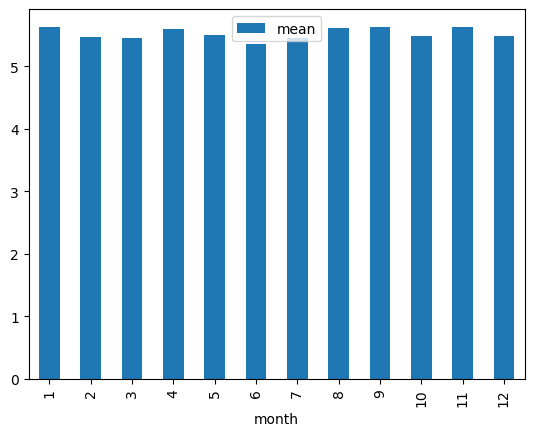

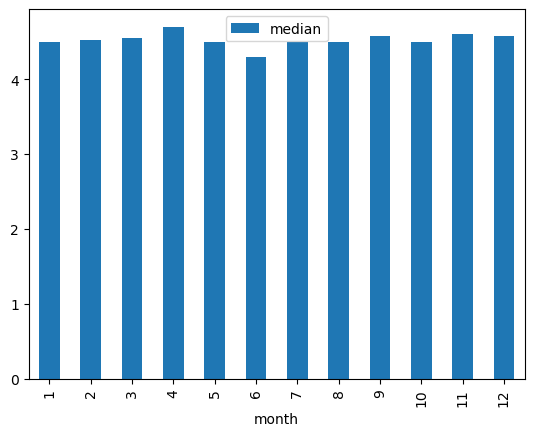

In [123]:
plt.show(month_grouped.plot.bar(x='month', y='mean'))
plt.show(month_grouped.plot.bar(x='month', y='median'))

The month of publication also does not affect the price. Let's check if the year affects the price of the apartment

In [124]:
year_grouped = data.groupby('year').agg({'last_price': ['mean', 'median']})
year_grouped.columns = ['mean', 'median']
year_grouped = year_grouped.reset_index()
year_grouped

,year,mean,median
0,2014,8.869597,6.95
1,2015,6.232776,5.10
2,2016,5.531701,4.40
3,2017,5.417023,4.40
4,2018,5.374348,4.50
5,2019,5.854792,4.95


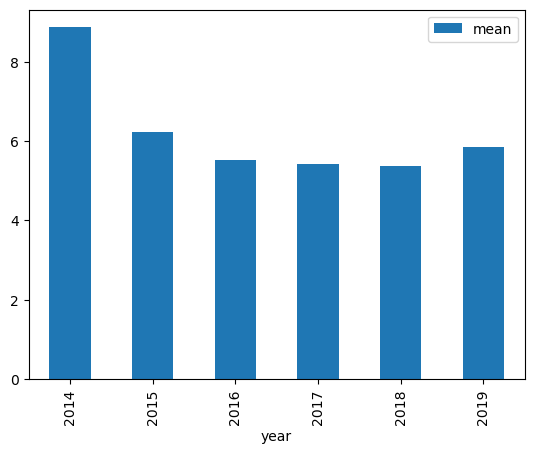

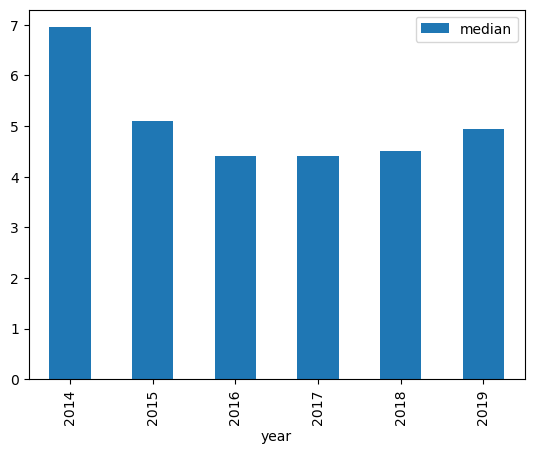

In [125]:
plt.show(year_grouped.plot.bar(x='year', y='mean'))
plt.show(year_grouped.plot.bar(x='year', y='median'))

We see that in 2014 the price was higher. Let's check the number of such ads.

In [126]:
data['year'].value_counts()

2018    8234
2017    7830
2019    2755
2016    2647
2015    1097
2014     122
Name: year, dtype: int64

There were relatively few ads in 2014. In this case, it is also impossible to say that there is an obvious dependence.

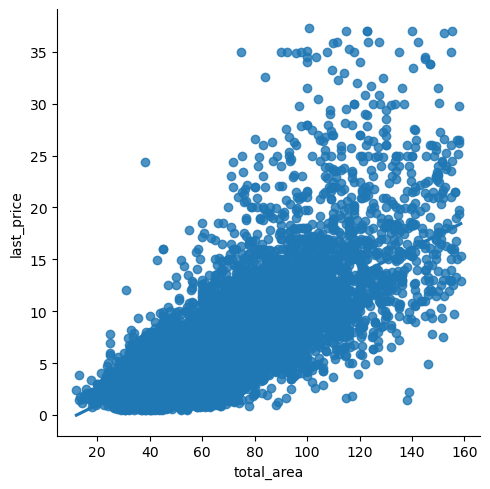

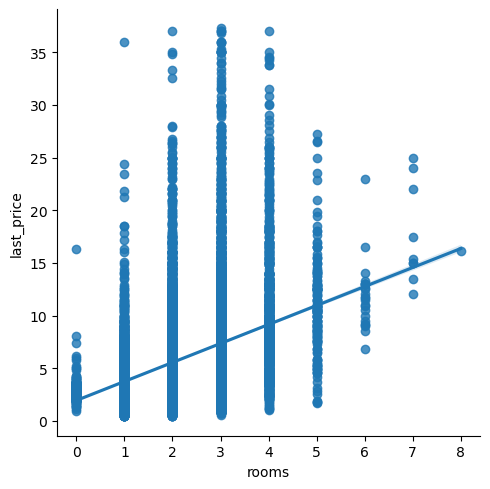

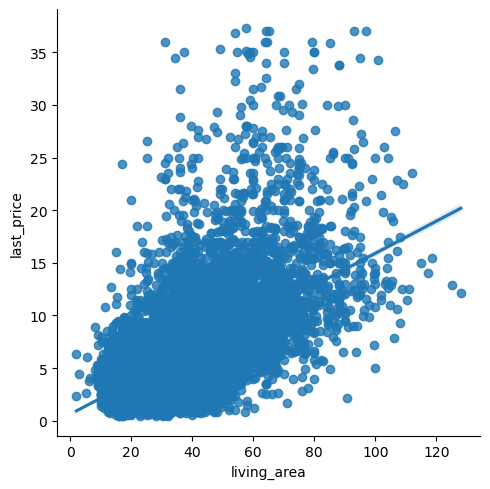

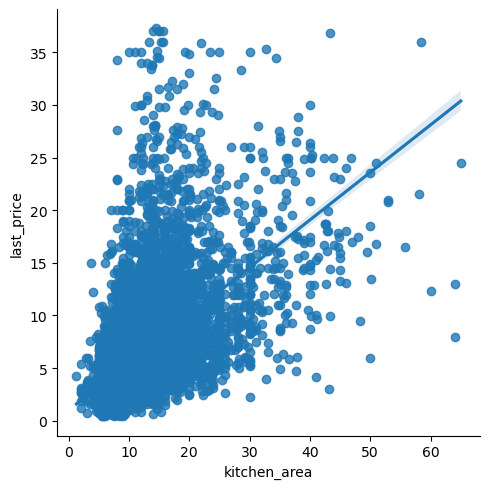

In [127]:
for i in ['total_area', 'rooms', 'living_area', 'kitchen_area']:
    sns.lmplot(data=data, x=i, y='last_price')

## Calculate the average price per square meter in 10 localities with the largest number of ads

In [128]:
t = data.groupby('locality_name').agg({'price_per_sq_meter': ['count', 'mean']})
t.columns = ['announcements', 'mean_price']
t = t.sort_values('announcements', ascending=False)
t.head(10)

,announcements,mean_price
locality_name,,
Санкт-Петербург,14794,110610.773438
Мурино,590,86087.515625
Кудрово,471,95326.179688
поселок Шушары,439,78655.101562
Всеволожск,394,68608.882812
Пушкин,351,102576.296875
Колпино,336,75359.085938
поселок Парголово,326,90332.265625
Гатчина,306,68799.625000


In [129]:
t = t.head(10)

The city with the most expensive apartments:

In [130]:
t.head(1)

,announcements,mean_price
locality_name,,
Санкт-Петербург,14794,110610.773438


The locality with the least expensive apartments:

In [131]:
t.tail(1)

,announcements,mean_price
locality_name,,
Выборг,225,57902.273438


## Calculate the average price of each kilometer in St. Petersburg

In [132]:
data_spb = data.query('locality_name == "Санкт-Петербург"')
data_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_meter,day_of_week,month,year,floor_type,cityCenters_nearest_km
0,20,13.000,108.000000,2019-03-07,3,2.70,16.0,51.000000,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.367188,3,3,2019,Other,16.0
2,10,5.196,56.000000,2015-08-20,2,2.65,5.0,34.299999,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.710938,3,8,2015,Other,14.0
4,2,10.000,100.000000,2018-06-19,2,3.03,14.0,32.000000,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.000000,1,6,2018,Other,8.0
7,5,7.915,71.599998,2019-04-18,2,2.65,24.0,NaN,22,False,False,False,18.9,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,110544.695312,3,4,2019,Other,12.0
9,18,5.400,61.000000,2017-02-26,3,2.50,9.0,43.599998,7,False,False,False,6.5,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,88524.593750,6,2,2017,Other,15.0


In [133]:
data_spb_gr = data_spb.groupby('cityCenters_nearest_km').agg({'last_price':['count', 'mean']})
data_spb_gr.columns = ['announcements', 'mean_price']
data_spb_gr = data_spb_gr.reset_index()
data_spb_gr

,cityCenters_nearest_km,announcements,mean_price
0,0.0,7,12.081222
1,1.0,122,10.587139
2,2.0,195,10.057738
3,3.0,266,9.170501
4,4.0,555,9.945205
5,5.0,728,10.380892
6,6.0,511,9.789370
7,7.0,364,10.018736
8,8.0,567,8.418978
9,9.0,584,6.719004


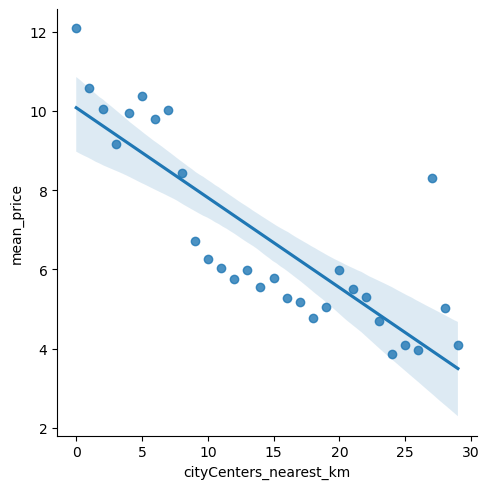

In [134]:
sns.lmplot(data=data_spb_gr, x='cityCenters_nearest_km', y='mean_price')
plt.show()

### Let's use linear regression to estimate how the cost of each kilometer changes

In [135]:
model = LinearRegression()

In [136]:
x = np.array(data_spb_gr['cityCenters_nearest_km']).reshape(-1, 1)
y = data_spb_gr['mean_price']

In [137]:
model = model.fit(x, y)

In [138]:
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.6965031448486274


In [139]:
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

intercept: 10.079066671987299
slope: [-0.22698328]


In this case, we are interested in the slope parameter, which is equal to -0.227. This means that according to the linear equation that we built to determine the relationship between the price of an apartment and the distance from the city center, with an increase in the distance from the city center by 1 km, the price decreases by an average of 227 thousand rubles.

# Conclusions

In this project, the following tasks were set: to perform data preprocessing and study them in order to find interesting features and dependencies that exist in the real estate market.
1. I started the work by uploading the data and determining the correct separator. After that, I built histograms for the initial estimation of outliers in the data. 
According to the histograms, it was immediately determined that those that are associated with the area, price and ceiling height are knocked out. The ceiling height data reaches 100 m, which is clearly an error. This may be due to the fact that some data may be specified in decimeters rather than meters. The price and area may well be real, but rare.

2. Omissions were identified at the data preprocessing stage. Some of the gaps were filled with median values, some were filled with zeros or logical values. 
Also at this stage, the data types in some columns were changed. In the date and time column, the data type was changed from str to datetime. Replaced the data type from float64 to float32 to save memory. I changed float64 to float32 and int64 to int32. Implicit duplicates in the column with localities were also removed. 
The outlier values were also replaced or deleted. As a result, 4.28% of the rows were deleted.

3. Several new columns have been added: the price of one meter, day of the week, month, year, type of apartment floor, distance to the city center in kilometers.

4. The distribution features of some parameters were studied, such as price, area, number of rooms, ceiling height, apartment floor, apartment floor type, etc.
a. It turned out that there are fewer publications on the sale of apartments on weekends than on weekdays.

b. The lowest number of publications was recorded in the months with the largest number of holidays: May and January

c. Speaking about the speed of apartment sales, we can say the following: the median number of days of apartment sales is 94. In half of the cases, apartments are sold for a period of 44 to 228 days

d. It was also noticed that a lot of apartments are sold in 45 and 60 days.

e. The factor that most affects the price of an apartment is its area.

f. The 10 localities with the largest number of ads were identified. St. Petersburg is in the first place, Vyborg is on the 10th.

g. It was also determined that, on average, in St. Petersburg, the price of an apartment decreases by 227 thousand rubles with each kilometer from the city center.

h. The relationship between the average price of an apartment and the type of floor was revealed. It turned out that apartments are cheaper on the ground floor, followed by apartments on the last floor. Apartments that do not belong to the two listed categories turned out to be the most expensive.